## 1) Write a program to compare the cross validation accuracies 
Of different ML models using box plot. Use the classification
algorithms KNN, Logistic Regression, Decision Tree, Naïve Bayes,
& SVC. Try with the following datasets.
a. Iris
b. pima-indians-dataset
c. any other dataset you have identified earlier.
d. banking dataset (bank.csv)
(Based on the nature of data set, some algorithms may take long
time for accuracy computation. You may ignore that algorithm
and proceed to get results, if it takes very long time.)

### Iris Dataset

In [10]:
#import all specified classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#import model selection and validation metrices
from sklearn.model_selection import cross_val_score,KFold
#graph plot package
import matplotlib.pyplot as plt

import pandas as pd

In [27]:


#function to compaire diff classifiers and plots accuracy of each as box plots

def eval_classifiers(X,y,data_name,ignore_svm=False):
    plt.close()
    models = [("KNN",KNeighborsClassifier()), ("NB",GaussianNB()), ("LR",LogisticRegression()), ("CART",DecisionTreeClassifier())]
    if(not ignore_svm):   #SVM takes longer time for cross validation on large data set
        models.append(("SVM",SVC()))
        
    models.sort()
    results = []
    names = []
    scoring = 'accuracy'
    
    for name,model in models:
        kfold = KFold(n_splits = 10, random_state = 7)
        score = cross_val_score(model,X,y,cv=kfold,scoring=scoring)
        results.append(score)
        names.append(name)

    #plot results using box plot
    fig = plt.figure()
    fig.suptitle('Classifier Comparision on %s'%(data_name))
    ax=fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
    
  

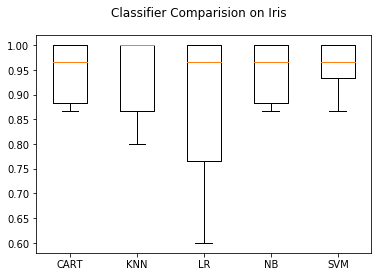

In [28]:
#evaluate Iris
from sklearn.datasets import load_iris

iris = load_iris() 
X = iris.data
y = iris.target

eval_classifiers(X,y,'Iris')  

### Prima-Indians-dataset

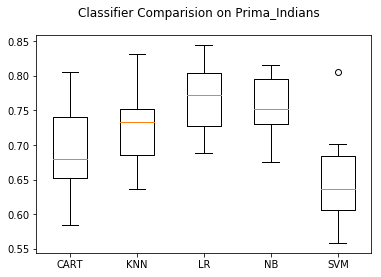

In [29]:
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
data=pd.read_csv(url)
data=data.as_matrix()
X=data[:,0:8]
y=data[:,8]

eval_classifiers(X,y,'Prima_Indians')

### Banking data